In [1]:
#%pip install  matplotlib

In [3]:
# imPORT LIBRARIES 
import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import pi, sqrt
#import handcalcs.render
import pandas as pd
import json 
# !pip install handcalcs

In [4]:
def calculate_Mg(Ln, fn, Qe):
    numerator = Ln * fn**2
    denominator_real = (Ln + 1) * fn**2 - 1
    denominator_imag = (fn**2 - 1) * fn * Qe * Ln
    denominator = np.sqrt(denominator_real**2+ denominator_imag**2)
    Mg = abs(numerator / denominator)
    return Mg


In [18]:
fn = np.arange(0.6,1.5,0.001)
qe = np.linspace(0,0.55,5)

Fr = 100.26 kHz, Ln =3.95


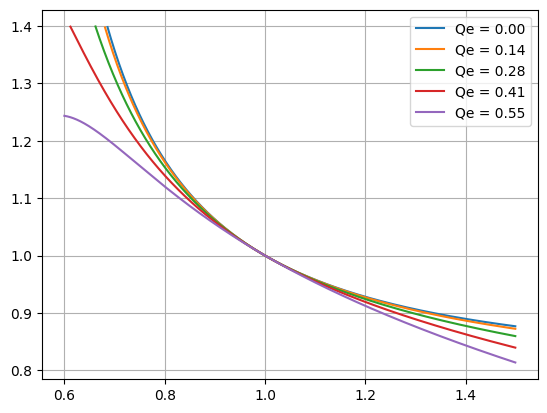

In [19]:
Lr = 21e-6
Lm = 83e-6
Cr= 15*8e-9
Ln = Lm/Lr
Fr = 1/(2*pi*sqrt(Lr*Cr))
print(f"Fr = {Fr/1000:.2f} kHz, Ln ={Ln:.2f}")
for q in qe: 

    Mg = calculate_Mg(Ln, fn, Qe= q)

    mask= Mg<1.4
    Mg2= Mg[mask]
    fn2 =fn[mask]
    plt.plot(fn2 , Mg2, label = f"Qe = {q:.2f}")

#plt.ylim([None,1.4])
plt.grid()
plt.legend()

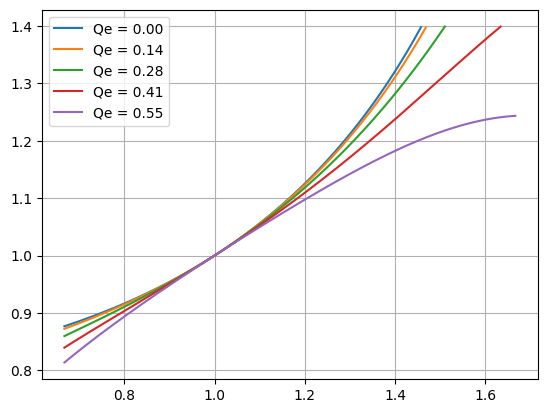

In [20]:
for q in qe: 

    Mg = calculate_Mg(Ln, fn, Qe= q)

    mask= Mg<1.4
    Mg2= Mg[mask]
    fn2 =fn[mask]
    x = 1/fn2 # period
    plt.plot(x , Mg2, label = f"Qe = {q:.2f}")

#plt.ylim([None,1.4])
plt.grid()
plt.legend()

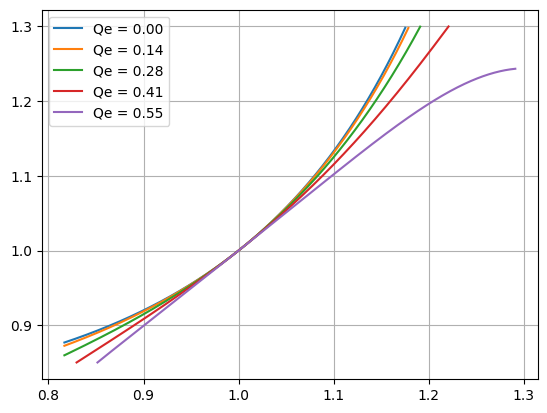

In [30]:
for q in qe: 

    Mg = calculate_Mg(Ln, fn, Qe= q)

    mask= Mg<1.3
    mask2 = Mg >0.85
    mask = mask & mask2
    Mg2= Mg[mask]
    fn2 =fn[mask]
    
    x = 1/fn2 # period
    x= np.pow(x, 1/2)
    plt.plot(x , Mg2, label = f"Qe = {q:.2f}")

#plt.ylim([None,1.4])
plt.grid()
plt.legend()

In [39]:
def calculate_Mg_ab(Ln, fn, Qe):
    numerator = Ln * fn**2
    denominator_real = (Ln + 1) * fn**2 - 1
    denominator_imag = (fn**2 - 1) * fn * Qe * Ln
    #denominator = np.sqrt(denominator_real**2+ denominator_imag**2)
    a = (fn**2 - 1) * fn * Ln
    b = denominator_real
    
    return a, b


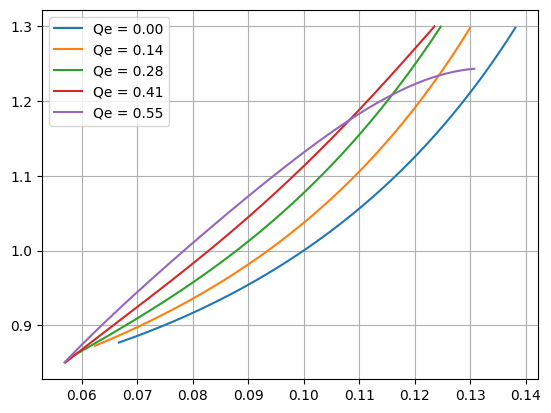

In [58]:
arr=[]
for q in qe: 

    Mg = calculate_Mg(Ln, fn, Qe= q)
    arr.append(Mg)

    mask= Mg<1.3
    mask2 = Mg >0.85
    mask = mask & mask2
    Mg2= Mg[mask]
    fn2 =fn[mask]
    
    x = 1/fn # period
    a= 5
    b= 10
    #a, b = calculate_Mg_ab(Ln, fn, Qe=q)
    k = np.sqrt(b*2*q**2 +a**2 )
    k= a*q+b
    x= x/k
    #x = 1/x
    plt.plot(x [mask], Mg2, label = f"Qe = {q:.2f}")

#plt.ylim([None,1.4])
plt.grid()
plt.legend()

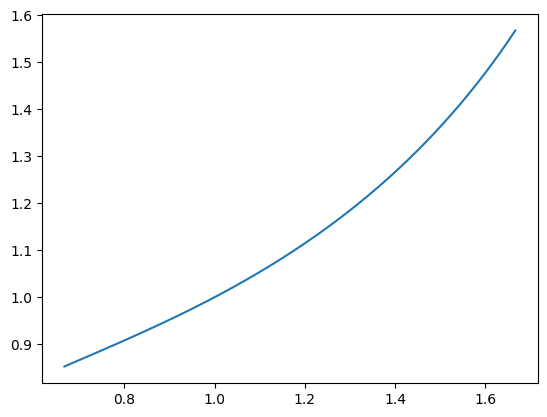

In [63]:
plt.plot(1/fn, np.mean(np.array(arr), axis=0))

In [71]:
def obj(x):
    a, b = x
    arr = []

    for q in qe:
        Mg = calculate_Mg(Ln, fn, Qe=q)
        k = a*q + b
        arr.append(Mg * k)

    arr = np.asarray(arr)
    return np.std(arr, axis=0).std()
obj([1.0, 1.0])


np.float64(0.026229957875905895)

In [80]:
from scipy.optimize import minimize

bounds = [(1e-3, None), (1e-3, None)]   # a >= 0, b >= 0e

res = minimize(
    obj,
    x0=[1.0, 1.0],
    method="L-BFGS-B",
    bounds=bounds
)

a_opt, b_opt = res.x



In [81]:
a, b = res.x
a, b

(np.float64(0.001), np.float64(0.001))

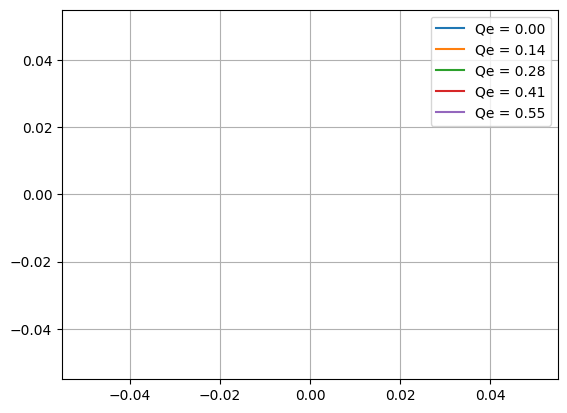

In [82]:

for q in qe: 

    Mg = calculate_Mg(Ln, fn, Qe= q)
    k = a*q + b
    Mg= Mg * k


    mask= Mg<1.3
    mask2 = Mg >0.85
    mask = mask & mask2
    Mg2= Mg[mask]
    fn2 =fn[mask]
    
    x = 1/fn # period

    #x = 1/x
    plt.plot(x [mask], Mg2, label = f"Qe = {q:.2f}")

#plt.ylim([None,1.4])
plt.grid()
plt.legend()

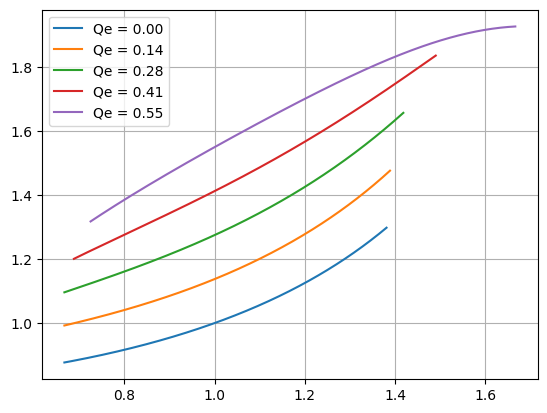

In [90]:
for q in qe: 

    Mg = calculate_Mg(Ln, fn, Qe= q)

    mask= Mg<1.3
    mask2 = Mg >0.85
    mask = mask & mask2
    Mg2= Mg[mask]
    fn2 =fn[mask]
    
    x = 1/fn2 # period

    plt.plot(x , Mg2*(q+1), label = f"Qe = {q:.2f}")

#plt.ylim([None,1.4])
plt.grid()
plt.legend()